In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time, math
df = pd.read_csv("/Users/AyshaZia/Desktop/rating.csv")

# Loading movies info
item = pd.read_csv("/Users/AyshaZia/Desktop/movie.csv")   

In [29]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [30]:
len(item), max(item['movieId']),min(item['movieId'])

(27278, 131262, 1)

In [31]:
df.shape

(20000263, 4)

In [33]:
n_users = len(df['userId'].unique())
n_items = len(item['movieId'].unique())
R_shape = (n_users, n_items)
print (str(n_users) + ' users')
print (str(n_items) + ' items')

138493 users
27278 items


In [12]:
rating= pd.read_csv("/Users/AyshaZia/Desktop/rating.csv")

In [13]:
tags = pd.read_csv("/Users/AyshaZia/Desktop/tag.csv")

In [19]:
rating.columns = rating.columns.astype(str).str.strip()
tags.columns = tags.columns.astype(str).str.strip()

if 'timestamp' in rating.columns:
    del rating['timestamp']

if 'timestamp' in tags.columns:
    del tags['timestamp']

In [20]:
print(rating.columns)
print(tags.columns)

Index(['userId', 'movieId', 'rating'], dtype='object')
Index(['userId', 'movieId', 'tag'], dtype='object')


In [21]:
rating['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [22]:
item.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
item.isnull().any().any()

False

In [23]:
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [15]:
rating.isnull().any().any()

False

In [24]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [25]:
tags.isnull().any().any()

True

In [26]:
tags=tags.dropna()

In [27]:
tags.isnull().any().any()

False

In [28]:
tags.shape

(465548, 3)

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

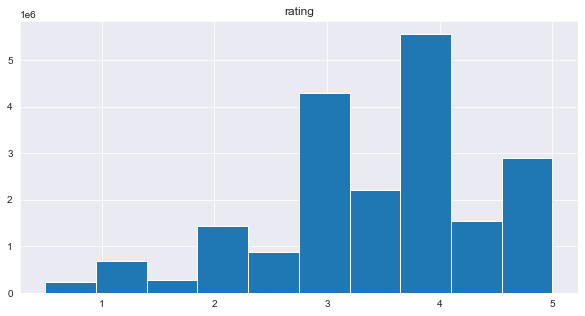

In [30]:
%matplotlib inline

rating.hist(column='rating', figsize=(10,5))

In [32]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: tag, dtype: int64

<AxesSubplot:>

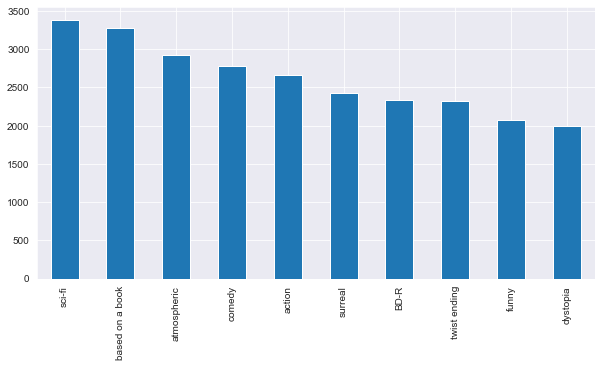

In [33]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))


In [35]:
rating_count = rating[['movieId','rating']].groupby('rating').count()
rating_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [37]:
average_rating = rating[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [39]:
item_count = rating[['movieId','rating']].groupby('movieId').count()
item_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [44]:
t = item.merge(tags, on='movieId', how='inner')
t.head()

average_rating = rating[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [46]:
joined = item.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000
